<a href="https://colab.research.google.com/github/srivishnu2805/Machine_Learning-23249-/blob/main/Principal_Component_Analysis/PCAexample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()

# Assign variables for clarity
target_names = data['target_names']
feature_names = data['feature_names']
print("Target names:", target_names)
print("Feature names (first 5):", feature_names[:5])

Target names: ['malignant' 'benign']
Feature names (first 5): ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']


In [2]:
# Create a DataFrame from the data
df1 = pd.DataFrame(data=data['data'], columns=data['feature_names'])
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Standardize the data
sc = StandardScaler()
scaled_data = sc.fit_transform(df1)

# Apply PCA with 3 components
principal = PCA(n_components=3)
principal.fit(scaled_data)
x = principal.transform(scaled_data)

# Print the shape of the transformed data
print("Shape of transformed data:", x.shape)

# Print the explained variance ratio of the principal components
print("Explained variance ratio:", principal.explained_variance_ratio_)

Shape of transformed data: (569, 3)
Explained variance ratio: [0.44272026 0.18971182 0.09393163]


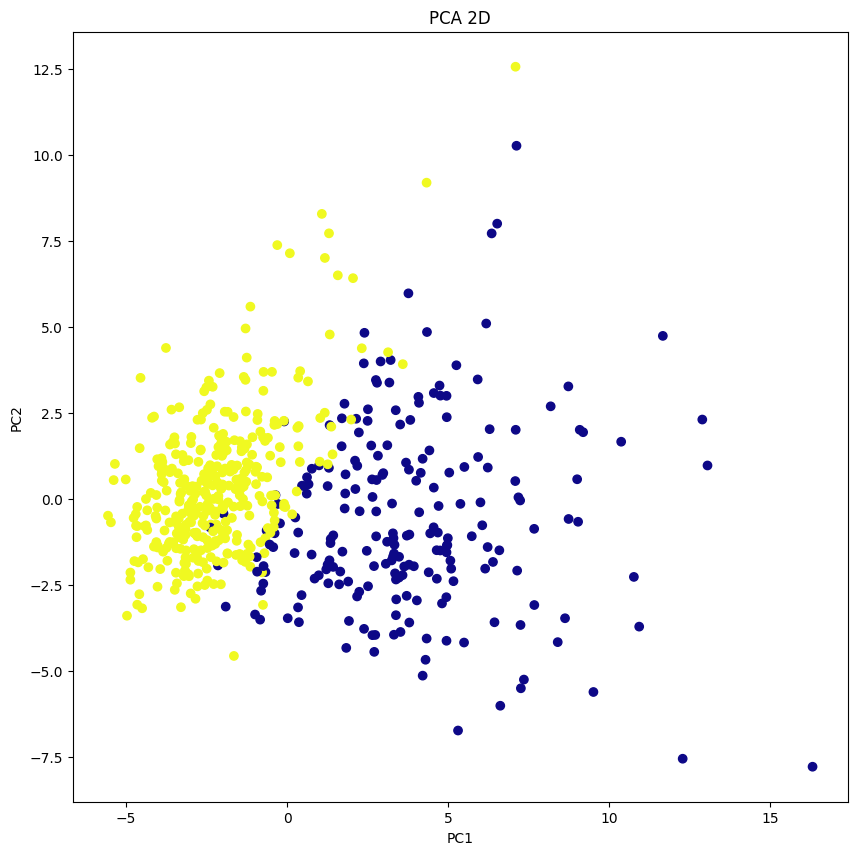

In [4]:
# Plot the 2D PCA results
plt.figure(figsize=(10, 10))
plt.title('PCA 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(x[:, 0], x[:, 1], c=data['target'], cmap='plasma')
plt.show()

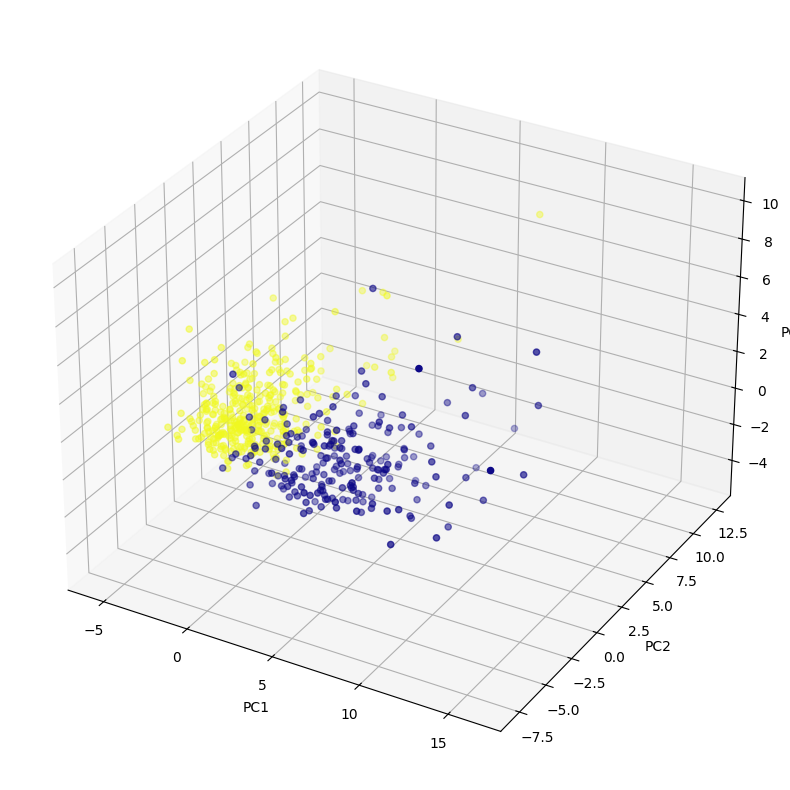

In [5]:
# Import the 3D plotting module
from mpl_toolkits.mplot3d import Axes3D

# Plot the 3D PCA results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC1', fontsize=10)
ax.set_ylabel('PC2', fontsize=10)
ax.set_zlabel('PC3', fontsize=10)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=data['target'], cmap='plasma')
plt.show()